`This is Genome sequencing`

## String Composition Problem:
### Generate the k-mer composition of a string.
     Input: A string Text and an integer k.
     Output: COMPOSITIONk(Text), where the k-mers are arranged in lexico
     graphic order.

In [221]:
def Compositionk(Text, k):
    kmers = []
    for i in range(len(Text)-k+1):
        kmers.append(Text[i:i+k])
    return sorted(kmers)



In [222]:
file = open('dataset_30153_3.txt')
lines = file.read().strip().splitlines()
k = int(lines[0])
Text = ''.join(lines[1:]).replace(' ', '').strip()

In [223]:
print(*Compositionk(Text, k))
file.close()

AAAAACCATCGCAAACCTAAATATTAGGCCGGATTTTACACTCTACCATGTAATTGGGAAATCGGGGTCATGGATACGGGGTAGTCCGGTTCAGGACATT AAAAACCCGATTACCACTCAAGCGTTTCAGGCTAATCTGAATTGAGTGTCTTCAGCGGCACCCTTGCATCCTATACATTATCCATTACTTCACGGACCAC AAAAACGACGACGCTCGGCTTGCGGGCTAGGACCATCTGAGGAGCTCGGACGCCCCTGGGGACTACTCCCCAGCCTTCTGCAGTTGCTTGACCGCCCGGA AAAAAGGTGATTCGGATTCCTAAACGCTCGACATAGGCGCTTCGAGTCCTTGCAAACCCCATCAAATTCGCCGTATGGTTATCGGCACAATAACCAGTGC AAAACAAGCCTGGGTGGTCGCCGCGGAACGCCTACTGGTAGTTCGGCCCTTGCACAATGCCGGATCCTACCGCGAGACGGAGCACTATGAAGCCTTAACG AAAACCATCGCAAACCTAAATATTAGGCCGGATTTTACACTCTACCATGTAATTGGGAAATCGGGGTCATGGATACGGGGTAGTCCGGTTCAGGACATTT AAAACCCCCAGTTATAAATAGTATCCCAAAGCTACAGTCGAATTAACAGCACTGCACCTATTCCCGAGGTTTGGAACCCAGAATTATTTTTGGCTGAGCA AAAACCCGATTACCACTCAAGCGTTTCAGGCTAATCTGAATTGAGTGTCTTCAGCGGCACCCTTGCATCCTATACATTATCCATTACTTCACGGACCACG AAAACCTACGCCTCCTATCCCCGCTACGCCATGTCGAGACGGGGAGTCCCCATCTCATAAACCCGTACTCGGGCCTAGCAGGACATGCAGGTACCGGGAT AAAACGACGACGCTCGGCTTGCGGGCTAGGACCATCTGAGGAGCTCGGACGCCCCTGGGGACTACTCCCCAGCCTTCTGCAGTTGCTTGAC

# String Reconstruction Problem:
 ### Reconstruct a string from its k-mer composition.
    Input: An integer k and a collection Patterns of k-mers.
    Output: A string Text with k-mer composition equal to Patterns
           (if such astring exists)

In [224]:
def StringConstruct(kmers):
    Required_string = [kmers[0]]
    n = len(kmers)
    for i in range(1,n):
        Required_string.append(kmers[i][-1])
    return Required_string



In [225]:
with open('dataset_30182_3.txt', "r") as file:
    content = file.read()             # Read entire content
    kmers = content.strip().split()
print("".join(StringConstruct(kmers)))

GCTGCTGCCAATGCTTGAATCCAGCTACAGTCAAGTGTTTGTGGTGGTGTTCAAGTGTCACTCAGCGTGTTATGGCCTAGTACAAATTGTGTTTTCCTTGTTGGTTTAAGTCTTTCAGAACTGGGATCGTAATGAAATTTCGCGCAGTATTCACTCAGTGTAGTAACCGTATCAGCGGACAGAGAGGGATTAGTATAGCTGAACCGCGAAGTATCGTCATGCAGGACCATCCATGTCCGTGCCAAACACAGTATCACCGGTGGATAAGTAGGACTAATGGCAGGCAGACGGGACAGCCGACGAACCCTCGTTATCTTGCAGGCCGTCAAGTTTATTAGATTGCCCTGCGGCAGATCAGTGGTAATTGCCTGTCGTCCCGCTCCTTGTGGCTCCAAATTTTTCCTCGCCTTGGATTACGTGGATTGATCAAATGACACTGCACACTGTGATCCTAGTTAGGTGTTGAATGTTGGCTTGCTGTAAGTACACTTTCGTTGATCACACTTACCCACTACGCGATCCATATTTGGAGCAGAGAGGCTAAAGCCTTCTTTCAGTTGACCGGGGTTCACCAGGATTAAAATGCGGTCCGTTAAGAACATTCGATAAAATGGGCGCCCGCGATCGGCCTTCACCACCCTATGGGGCCGTAGAGGGGTGTTTCACCCCGTGATGTCGGTCTCTAGCATTGATGCGGTACAGGATAACAGGGCCCGCTACTGAGCCTGAAATACAAATAAGCGACCGGCGCAAGCCAGATTCACCCCATGAAGAGGATGAGAGTCCTTTACATTGCGCCGTGATCCGACCCAGCCGGTGTGTTGTACGTCATTGCCCTTCTGAATTAGACCTACATCGGCCGGAGCCTGACCTAGCTTTTGCAAATACCGGACGGGTGTACATTAGGTAAAGTAGATGGTCTGAACGACTAGGGAAGCATACAAGGAGACCATGGAAGCTTCGCCTGTAAATTTTACCGTGTCACGATACACAAATACCC

# Overlap Graph Problem:
 ## Construct the overlap graph of a collection of k-mers.
    Input: A collection Patterns of k-mers.
    Output: The overlap graph OVERLAP(Patterns).

In [226]:
'''def Overlap(Patterns):
    Overlap_graph = {}
    k = len(Patterns[0])
    for pattern in Patterns:
        suffix = pattern[1:k]
        overlaps = []
        for candidate in Patterns:
            if pattern != candidate and suffix == candidate[0:k-1]:
                overlaps.append(candidate)
        if overlaps:
            Overlap_graph[pattern] = overlaps
    return Overlap_graph'''

'def Overlap(Patterns):\n    Overlap_graph = {}\n    k = len(Patterns[0])\n    for pattern in Patterns:\n        suffix = pattern[1:k]\n        overlaps = []\n        for candidate in Patterns:\n            if pattern != candidate and suffix == candidate[0:k-1]:\n                overlaps.append(candidate)\n        if overlaps:\n            Overlap_graph[pattern] = overlaps\n    return Overlap_graph'

In [227]:
# optimised code
def Overlap(Patterns):
    k = len(Patterns[0])
    prefix_map = {}
    for pattern in Patterns:
        prefix = pattern[0:k-1]
        prefix_map.setdefault(prefix, []).append(pattern)

    Overlap_graph = {}
    for pattern in Patterns:
        suffix = pattern[1:k]
        if suffix in prefix_map:
            Overlap_graph[pattern] = prefix_map[suffix]
    return Overlap_graph


In [228]:
My_dict = { 'alice': [1, 2, 4]
           , 'bob': [0]}

alices = My_dict.setdefault('alice', [22]).append(119)
print(alices) #alices = ...: The assignment operator (=) assigns the final return value of the entire expression to alices. Since the last operation was .append(), its return value (None) is what gets assigned.
ram = My_dict.setdefault('bob', [44])
ram.append(98)
ram

None


[0, 98]

In [229]:
with open('overlap.txt', "r") as file:
    content = file.read()

Patterns = content.split()
graph = Overlap(Patterns)

for key in graph:
    print(f"{key}: {' '.join(graph[key])}")

TACAGCCTGGCACGGCGAGCAGAAG: ACAGCCTGGCACGGCGAGCAGAAGT
TGCGGTAAACAAAGCTATCTTAACG: GCGGTAAACAAAGCTATCTTAACGC
TCTTACCGTGGGAGGCCGTTCTAGC: CTTACCGTGGGAGGCCGTTCTAGCC
TCGCGTTCCACCCCTCCAGTCAGGG: CGCGTTCCACCCCTCCAGTCAGGGT
GGTTACTAAAGCACCAGCGCATCCA: GTTACTAAAGCACCAGCGCATCCAG
GAACGGTCGGCTGCCTTCAGACGTT: AACGGTCGGCTGCCTTCAGACGTTA
GACGATACGCTCATGCACATGTTCA: ACGATACGCTCATGCACATGTTCAG
GTACCAAGTTTCTGGGTGCCATAGT: TACCAAGTTTCTGGGTGCCATAGTC
TTTTGGGTAAGTGATGGTAAGGATT: TTTGGGTAAGTGATGGTAAGGATTC
TGACAGTAGGAACCACCCGTTTACT: GACAGTAGGAACCACCCGTTTACTA
ATTGGATGGCGGGGTACCCGCCGGT: TTGGATGGCGGGGTACCCGCCGGTG
GAGCTTAGCCGTGTACGGAATGCAC: AGCTTAGCCGTGTACGGAATGCACG
GTCCAAATCCAAAGAGATAGGGCGA: TCCAAATCCAAAGAGATAGGGCGAA
ATCAAGGAATAGTACCTTAACTGTA: TCAAGGAATAGTACCTTAACTGTAA
GACCACCCTTGTCTTCCTCATGCGC: ACCACCCTTGTCTTCCTCATGCGCA
TGACGATTTGAAGACACAGAACGTA: GACGATTTGAAGACACAGAACGTAG
CATTGACCGGTAATACGCGAGCCAA: ATTGACCGGTAATACGCGAGCCAAA
AATTACCCTACAGTGTCATGCCGGG: ATTACCCTACAGTGTCATGCCGGGT
GTAGCATGCCAAGGAATAATCCATA: TAGCATGCCAAGGAATAAT

# DeBruijn Graph from a String Problem:
## Construct the de Bruijn graph of a string.
    Input: A string Text and an integer k.
    Output:DEBRUIJNk(Text).

In [230]:
def DeBruijnFromText(Text, k):
    n = len(Text)
    graph = {}
    for i in range(n-k+1):
        prefix = Text[i:i+k-1]
        suffix = Text[i+1:i+k]
        graph.setdefault(prefix, []).append(suffix)
    return graph

In [231]:
with open('dbformtext.txt', "r") as file:
    lines = file.read().strip().splitlines()
    k = int(lines[0])
    Text = ''.join(lines[1:]).replace(' ', '').strip() # remove all spaces within the text if there is one
    #Text = lines[1] it could be used if you know your file does not have any whitespaces
    graph = DeBruijnFromText(Text, k)
for key in sorted(graph):
        print(f"{key}: {' '.join(graph[key])}")

AAAAACTACGC: AAAACTACGCG
AAAACTACGCG: AAACTACGCGG
AAAAGATCTAT: AAAGATCTATA
AAAAGCAGACG: AAAGCAGACGT
AAAAGCGCAGG: AAAGCGCAGGC
AAAATAACAGT: AAATAACAGTT
AAAATATCCCA: AAATATCCCAA
AAAATCAGTAC: AAATCAGTACC
AAAATGCCAGC: AAATGCCAGCT
AAACAGTTCCC: AACAGTTCCCT
AAACATTCAGG: AACATTCAGGT
AAACGGCCTTA: AACGGCCTTAT
AAACGGCGGCG: AACGGCGGCGG
AAACTAAGTTG: AACTAAGTTGG
AAACTACATCG: AACTACATCGA
AAACTACGCGG: AACTACGCGGT
AAACTAGGTTC: AACTAGGTTCG
AAACTCTCATT: AACTCTCATTC
AAAGACGCTCT: AAGACGCTCTG
AAAGATAAGCT: AAGATAAGCTA
AAAGATCTATA: AAGATCTATAG
AAAGCAGACGT: AAGCAGACGTG
AAAGCGAGACT: AAGCGAGACTC
AAAGCGCAGGC: AAGCGCAGGCA
AAAGGATAGGT: AAGGATAGGTC
AAATAACAGTT: AATAACAGTTT
AAATACGAAGT: AATACGAAGTC
AAATATCCCAA: AATATCCCAAA
AAATCAGTACC: AATCAGTACCG
AAATCCCAGTA: AATCCCAGTAC
AAATGCAGCAC: AATGCAGCACA
AAATGCCAGCT: AATGCCAGCTC
AAATTATGCCG: AATTATGCCGC
AAATTGCCAAT: AATTGCCAATC
AAATTGTCGCC: AATTGTCGCCG
AACAAATCCCA: ACAAATCCCAG
AACAACGGACT: ACAACGGACTT
AACAAGAAAAT: ACAAGAAAATG
AACACGTCCCA: ACACGTCCCAA
AACACTCCTTG: ACACTCCTTGA


# Eulerian Path Problem:
### Construct an Eulerian path in a graph.
    Input: A directed graph.
    Output: A path visiting every edge in the graph exactly once (if such a path
    exists).

# DeBruijn Graph from k-mers Problem:
## Construct the de Bruijn graph of a collection of k-mers.
 `Input`: A collection of k-mers Patterns.  
 `Output`: The de Bruijn graph DEBRUIJN(Patterns).

In [232]:
def DeBruijnFromkmers(Patterns):
    graph = {}
    for kmer in Patterns:
        prefix = kmer[:-1]
        suffix = kmer[1:]
        '''if prefix in graph:
            graph[prefix].append(suffix)
        else:
            graph[prefix] = [suffix] Instead of this We will use graph.setdefault(prefix, []).append(suffix)'''
        graph.setdefault(prefix, []).append(suffix)
    return graph
    

In [233]:
with open('dbfromKmer.txt', "r") as file:
    content = file.read()
    Patterns = content.split()
    graph = DeBruijnFromkmers(Patterns)

for key in sorted(graph):
        print(f"{key}: {' '.join(graph[key])}")



AAAAAATGTGCTCTGATAC: AAAAATGTGCTCTGATACC
AAAAAGAGTGGATTATTGA: AAAAGAGTGGATTATTGAC
AAAAATGTGCTCTGATACC: AAAATGTGCTCTGATACCC
AAAACACTGTATAGAGGCG: AAACACTGTATAGAGGCGG
AAAAGACCATTCTGAAGAC: AAAGACCATTCTGAAGACA
AAAAGAGTGGATTATTGAC: AAAGAGTGGATTATTGACC
AAAAGATAACCTCCAAAAG: AAAGATAACCTCCAAAAGA
AAAATGTGCTCTGATACCC: AAATGTGCTCTGATACCCA
AAAATTCTTAATTTTATAT: AAATTCTTAATTTTATATA
AAACACTGTATAGAGGCGG: AACACTGTATAGAGGCGGC
AAACCAATATTGAGATAGC: AACCAATATTGAGATAGCG
AAACCGCGCTCCGTCTAAC: AACCGCGCTCCGTCTAACG
AAACCTAGGTTTTGTCTAC: AACCTAGGTTTTGTCTACT
AAAGACCATTCTGAAGACA: AAGACCATTCTGAAGACAA
AAAGACTGGTCAAGCACCC: AAGACTGGTCAAGCACCCC
AAAGAGTGGATTATTGACC: AAGAGTGGATTATTGACCG
AAAGATAACCTCCAAAAGA: AAGATAACCTCCAAAAGAC
AAAGCGCACCCGAAAGGCC: AAGCGCACCCGAAAGGCCT
AAAGCGGTTAAAAGATAAC: AAGCGGTTAAAAGATAACC
AAAGCTCGGGCCGGGAAGA: AAGCTCGGGCCGGGAAGAG
AAAGGCCTCGGCTAATCTT: AAGGCCTCGGCTAATCTTA
AAAGTATAGCTTGCGGGGG: AAGTATAGCTTGCGGGGGT
AAATAGTCACATCCATGCA: AATAGTCACATCCATGCAA
AAATATTCACATAGGTCTG: AATATTCACATAGGTCTGA
AAATCCAAGTATTTTG

In [234]:
LALU = ['AATTC', 'ATTCG', 'TTCGA', 'TCGAA', 'GAATT']
RAMU = Overlap(LALU)
RAMU 

{'AATTC': ['ATTCG'],
 'ATTCG': ['TTCGA'],
 'TTCGA': ['TCGAA'],
 'GAATT': ['AATTC']}

## `EulerianCycle(Graph)`
    form a cycle Cycle by randomly walking in Graph (don't visit the same edge twice!)   
    while there are unexplored edges in Graph
        select a node newStart in Cycle with still unexplored edges
        form Cycle’ by traversing Cycle (starting at newStart) and then randomly walking 
        Cycle ← Cycle’
    return Cycle

In [235]:
def read_graph(filename):
    graph = {}
    with open(filename, 'r') as file:
        for line in file:
            if ':' in line:
                parts = line.strip().split(':')
                node = int(parts[0].strip())
                neighbors = list(map(int, parts[1].strip().split())) if parts[1].strip() else []
                graph[node] = neighbors
    return graph

In [236]:
read_graph('fileofgraph.txt')

{}

In [237]:
import random

In [238]:
def eulerian_cycle_directed(graph):
    graph_copy = {node: edges[:] for node, edges in graph.items()}
    start_node = next((node for node in graph_copy if graph_copy[node]), None)
    if start_node is None:
        return []
    cycle = []
    stack = [start_node]
    while stack:
    #    print('stack:', stack)
    #    print('cycle:', cycle)
        current = stack[-1]
        if graph_copy.get(current):
            next_node = graph_copy[current].pop()
            stack.append(next_node)
        else:
            cycle.append(stack.pop())

    cycle.reverse()
    return cycle

In [239]:
#graph = read_graph('fileofgraph.txt')
#cycle = eulerian_cycle_directed(graph)
#last_index = len(cycle)
#print(*cycle[0:last_index])



In [240]:
def find_eulerian_cycle(graph):

    # Convert adjacency list into a mutable dictionary
    stack = []
    cycle = []
    current_vertex = next(iter(graph))  # Start from any vertex
    stack.append(current_vertex)

    while stack:
        if graph[current_vertex]:  # If there are outgoing edges
            stack.append(current_vertex)
            next_vertex = graph[current_vertex].pop(0)  # Take the first outgoing edge
            current_vertex = next_vertex
        else:
            cycle.append(current_vertex)  # Backtrack
            current_vertex = stack.pop()
 
    return cycle[::-1]  # Reverse the cycle before returning

# Solve the Eulerian Path Problem.

`Input:` The adjacency list of a directed graph that has an Eulerian path.    
`Output:` An Eulerian path in this graph.   

In [241]:
from collections import defaultdict, deque

def parse_input_file(filename):
    adj_list = defaultdict(list)
    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or ':' not in line:
                continue
            src, dests = line.split(':')
            src = int(src.strip())
            dest_nodes = list(map(int, dests.strip().split()))
            adj_list[src] = dest_nodes
    return adj_list

def find_eulerian_path(adj_list):
    graph = defaultdict(deque)
    in_degree = defaultdict(int)
    out_degree = defaultdict(int)
    nodes = set()

    for src, dests in adj_list.items():
        for dest in dests:
            graph[src].append(dest)
            out_degree[src] += 1
            in_degree[dest] += 1
            nodes.update([src, dest])

    start = None
    for node in nodes:
        if out_degree[node] - in_degree[node] == 1:
            start = node
            break
    if start is None:
        start = next(iter(nodes))

    path = []
    stack = [start]

    while stack:
        curr = stack[-1]
        if graph[curr]:
            stack.append(graph[curr].popleft())
        else:
            path.append(stack.pop())

    return path[::-1]



In [242]:
#filename = 'fileofgraph.txt'  # Change to your file name
#adj_list = parse_input_file(filename)
#path = find_eulerian_path(adj_list)
#print("Eulerian Path:")
#print(" ".join(map(str, path)))

# `StringReconstruction(Patterns)`
    dB ← DeBruijn(Patterns)  
    path ← EulerianPath(dB)  
    Text ← PathToGenome(path)  
    return Text  

### Solve the String Reconstruction Problem.

`Input:` An integer k followed by a list of k-mers Patterns.   
`Output:` A string Text with k-mer composition equal to Patterns. (If multiple answers exist, you may return any one.)   

In [243]:
def path_to_genome(path):
    if not path:
        return ""
    genome = path[0]
    for node in path[1:]:
        genome += node[-1]
    return genome

def StringReconstruction(Patterns):
    db = DeBruijnFromkmers(Patterns)
    path = find_eulerian_path(db)
    Text = path_to_genome(path)
    return Text

In [244]:
with open('fileofgraph.txt', 'r') as file:
        k = int(file.readline().strip())
        Patterns = file.readline().strip().split()

StringReconstruction(Patterns)

'GGCTTACCA'

 # k-Universal Circular String Problem:
 ### Find a k-universal circular string.
 Input: An integer k.   
 Output:Ak-universal circular string.  

 we can construct a
 k-universal circular binary string by finding an Eulerian cycle in the de Bruijn graph
 constructed from the collection of all binary k-mers

In [245]:
# collection of all binary k-mers

from itertools import product

def binary_kmers(k):
    return [''.join(p) for p in product('01', repeat=k)]

# Example
print(binary_kmers(4))


['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


In [246]:
graph = DeBruijnFromkmers(binary_kmers(4))
kstring = eulerian_cycle_directed(graph)
print(find_eulerian_cycle(graph))


['000', '000', '001', '010', '100', '001', '011', '110', '101', '010', '101', '011', '111', '111', '110', '100', '000']


In [247]:
universal = StringReconstruction(binary_kmers(4))
universal 

'1000010011010111100'

In [248]:
def all_3_universal():
    base = "00010111"   # one de Bruijn sequence B(2,3)

    def rotations(s):
        return {s[i:] + s[:i] for i in range(len(s))}

    all_cycles = set()
    all_cycles |= rotations(base)
    all_cycles |= rotations(base[::-1])  # reverse

    return all_cycles

print(all_3_universal())


{'01011100', '11100010', '11000101', '01110100', '00111010', '11101000', '00010111', '11010001', '10001011', '10100011', '01000111', '10001110', '10111000', '00101110', '00011101', '01110001'}


In [249]:
from itertools import product

def build_debruijn_graph(k):
    """Builds de Bruijn graph for binary alphabet and k-mers."""
    nodes = [''.join(p) for p in product('01', repeat=k-1)]
    graph = {node: [] for node in nodes}
    for node in nodes:
        for bit in '01':
            edge = node + bit
            graph[node].append(edge[1:])  # suffix as next node
    return graph

def find_all_eulerian_cycles(graph, start):
    """Backtracking: enumerate all Eulerian cycles in graph."""
    n_edges = sum(len(v) for v in graph.values())
    path = [start]
    cycles = []

    def backtrack(node, used_edges):
        if len(used_edges) == n_edges:
            cycles.append(path[:])
            return
        for nxt in list(graph[node]):
            edge = (node, nxt)
            if edge not in used_edges:
                used_edges.add(edge)
                path.append(nxt)
                backtrack(nxt, used_edges)
                path.pop()
                used_edges.remove(edge)

    backtrack(start, set())
    return cycles

def all_k_universal(k):
    g = build_debruijn_graph(k)
    start = next(iter(g))  # pick arbitrary start node
    cycles = find_all_eulerian_cycles(g, start)

    seqs = []
    for cycle in cycles:
        # Build string from cycle path
        s = cycle[0]
        for node in cycle[1:]:
            s += node[-1]
        seqs.append(s)
    return set(seqs)  # remove duplicates due to rotation

# Example: k=3
for s in all_k_universal(3):
    print(s)


0010111000
0001011100
0001110100
0011101000


# String Reconstruction from Read-Pairs Problem:
##### Reconstruct a string from its paired composition.
 Input: A collection of paired k-mers PairedReads and an integer d.    
 Output: A string Text with (k,d)-mer composition equal to PairedReads (if    
 such a string exists).    

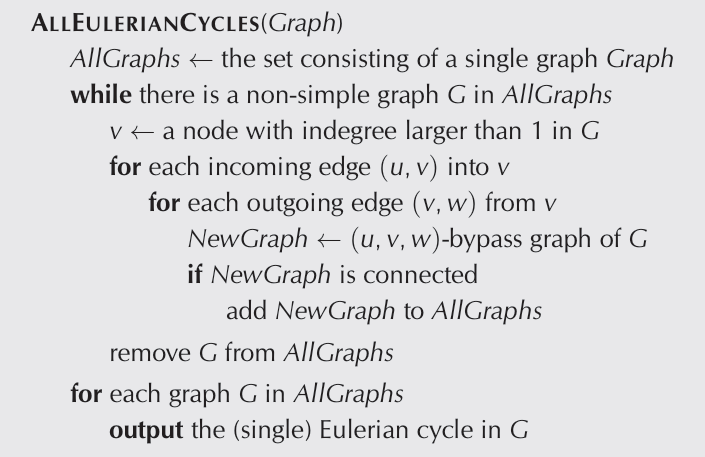 

In [250]:
#for checking a non-simple graph
def is_non_simple(graph):
    in_degree = {node: 0 for node in graph}
    for node in graph:
        for neighbor in graph[node]:
            in_degree[neighbor]+=1
    for node in graph:
        if len(graph[node])>1 or in_degree[node]>1:
            return True
    return False

In [251]:
#to find a node with indegree larger than one
def find_junction_node(graph):
    if not graph:
        return None
    in_degree = {node:0 for node in graph}
    for node in graph:
        for neighbor in graph[node]:
            if neighbor in in_degree:
                in_degree[neighbor]+=1
    
    for node in graph:
        if in_degree[node] > 1:
            return node
    return None

In [252]:
#for incoming edge into the found node
def get_predecessors(graph, target_node):
    predecessors = []
    for node, neighbors in graph.items():
        if target_node in neighbors:
            predecessors.append(node)
    return predecessors

In [253]:
# Perform bypass
import copy

def perform_bypass(original_graph, u, v, w):
    new_graph = copy.deepcopy(original_graph)
    new_graph[u].remove(v)
    new_graph[v].remove(w)
    new_graph[u].append(w)
    if not new_graph[v]:
        del new_graph[v]
    return new_graph


In [254]:
# check if new graph is connected
def _traverse(graph, start_node):
    visited = set()
    stack = [start_node]
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            if node in graph:
                for neighbor in graph[node]:
                    stack.append(neighbor)
    return visited

def _reverse_graph(graph):
    reversed_g = {node:[] for node in graph}
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            if neighbor not in reversed_g:
                reversed_g[neighbor] = []
            reversed_g[neighbor].append(node)
    return reversed_g

#checking
def is_strongly_connected(graph):
    if not graph or len(graph) <= 1:
        return True
    start_node = next(iter(graph))
    visited_forward = _traverse(graph, start_node)
    if len(visited_forward)!= len(graph):
        return False
    
    reversed_g = _reverse_graph(graph)
    visited_backward = _traverse(reversed_g, start_node)
    if len(visited_backward) != len(graph):
        return False
    
    return True


In [255]:
import copy

def find_all_eulerian_cycles(graph):
    """
    Finds all distinct Eulerian cycles in a directed graph using a backtracking approach.
    """
    # We need to modify the graph (by removing edges), so work on a deep copy.
    graph_copy = copy.deepcopy(graph)
    
    # This list will hold all the final, complete cycles found.
    all_cycles = []

    # The stack will store potential paths. Each item is (path, current_graph_state).
    # We start at an arbitrary node, for example, the first key in the dictionary.
    start_node = next(iter(graph_copy))
    stack = [([start_node], graph_copy)]

    while stack:
        path, current_graph = stack.pop()
        last_node = path[-1]

        # If there are outgoing edges from the last node in our path...
        if last_node in current_graph and current_graph[last_node]:
            
            # This is a junction. For every possible next step, create a new path.
            # We iterate in reverse to pop from the stack in a natural order.
            for neighbor in reversed(current_graph[last_node]):
                
                # Create a copy of the graph state to explore this new branch
                next_graph = copy.deepcopy(current_graph)
                
                # "Use up" the edge by removing it
                next_graph[last_node].remove(neighbor)
                
                # Create the new path
                new_path = path + [neighbor]
                
                # Add the new path and its corresponding graph state to the stack
                stack.append((new_path, next_graph))
        
        # If there are no outgoing edges from the last node...
        else:
            # Check if we have formed a valid, complete cycle
            # A cycle is complete if all edges have been used.
            is_complete = all(not edges for edges in current_graph.values())
            
            # A cycle must start and end at the same node.
            if is_complete and path[0] == path[-1]:
                all_cycles.append(path)

    return all_cycles

# Your directed graph
graph = {
    'A': ['B'],
    'B': ['C'],
    'C': ['A', 'D'], # Junction node
    'D': ['E'],
    'E': ['C']
}

# Find and print the cycles
cycles = find_all_eulerian_cycles(graph)
for c in cycles:
    print("Found cycle:", " → ".join(c))

Found cycle: A → B → C → D → E → C → A


In [256]:
graph = {
        'A': ['B'],
        'B': ['C'],
        'C': ['A', 'D'], # Junction node
        'D': ['E'],
        'E': ['C']
}
cycles = all_eulerian_cycles(graph)
cycles

NameError: name 'all_eulerian_cycles' is not defined

# This is my code 

In [ ]:
def ALL_Eulerian_Cycles(graph):
    AllGraphs = [graph]
    while any(is_non_simple(G) for G in AllGraphs):
        current_graph = AllGraphs.pop(0)
        v = find_junction_node(current_graph)
        incoming_nodes = get_predecessors(current_graph, v)
        outgoing_nodes = current_graph[v]
        for u in incoming_nodes:
            for w in outgoing_nodes:
                new_graph = perform_bypass(current_graph, u, v, w)
                if is_strongly_connected(new_graph):
                    AllGraphs.append(new_graph)
    for G in AllGraphs:
        print(find_eulerian_cycle(G))

        
    

In [ ]:
graph = {
        'A': ['B'],
        'B': ['C'],
        'C': ['A', 'D'], # Junction node
        'D': ['E'],
        'E': ['C']
}
cycles = ALL_Eulerian_Cycles(graph)
cycles

['A', 'B', 'D', 'E', 'C', 'A']
['A', 'B', 'C', 'D', 'E', 'A']


In [ ]:

import copy
from collections import deque

# ==============================================================================
# == Phase 1: Graph Connectivity and Manipulation Helpers
# ==============================================================================

def is_strongly_connected(graph):
    """
    Checks if a directed graph is strongly connected using two DFS traversals.
    """
    if not graph:
        return True  # An empty graph is considered connected.
    
    start_node = next(iter(graph))
    
    # First pass: Check if all nodes are reachable from the start node.
    visited_forward = _traverse(graph, start_node)
    if len(visited_forward) != len(graph):
        return False

    # Second pass: Reverse the graph and check reachability again.
    reversed_g = _reverse_graph(graph)
    visited_backward = _traverse(reversed_g, start_node)
    if len(visited_backward) != len(graph):
        return False

    return True

def _traverse(graph, start_node):
    """Helper for is_strongly_connected: Performs DFS and returns visited nodes."""
    visited = set()
    stack = [start_node]
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            if node in graph:
                for neighbor in graph[node]:
                    stack.append(neighbor)
    return visited

def _reverse_graph(graph):
    """Helper for is_strongly_connected: Creates a new graph with all edges reversed."""
    reversed_g = {node: [] for node in graph}
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            if neighbor not in reversed_g:
                reversed_g[neighbor] = []
            reversed_g[neighbor].append(node)
    return reversed_g

def perform_bypass(original_graph, u, v, w):
    """
    Creates a new graph by bypassing node 'v' for the path u -> v -> w.
    """
    new_graph = copy.deepcopy(original_graph)
    new_graph[u].remove(v)
    new_graph[v].remove(w)
    new_graph[u].append(w)

    # If the junction node 'v' is now isolated, remove it.
    if not new_graph[v] and all(v not in neighbors for neighbors in new_graph.values()):
        del new_graph[v]
        
    return new_graph

# ==============================================================================
# == Phase 2: Main Algorithm
# ==============================================================================

def _get_degrees(graph):
    """Calculates the in-degree and out-degree of every node."""
    in_degree = {node: 0 for node in graph}
    out_degree = {node: 0 for node in graph}
    for node, neighbors in graph.items():
        out_degree[node] = len(neighbors)
        for neighbor in neighbors:
            if neighbor in in_degree:
                in_degree[neighbor] += 1
    return in_degree, out_degree

def _is_simple_cycle(graph, degrees):
    """Checks if a graph is a simple cycle (all degrees are 1)."""
    in_degree, out_degree = degrees
    return all(in_degree.get(n, 0) == 1 and out_degree.get(n, 0) == 1 for n in graph)

def _find_junction_node(graph, degrees):
    """Finds a node with an in-degree greater than 1."""
    in_degree, _ = degrees
    for node in graph:
        if in_degree.get(node, 0) > 1:
            return node
    return None

def _traverse_simple_cycle(graph):
    """Traverses a simple cycle graph and returns the path."""
    start_node = next(iter(graph))
    path = [start_node]
    current = start_node
    while True:
        next_node = graph[current][0]
        if next_node == start_node:
            path.append(start_node)
            break
        path.append(next_node)
        current = next_node
    return path

def all_eulerian_cycles(graph):
    """
    Implements the ALLEULERIANCYCLES pseudocode to find all unique
    Eulerian cycles in a balanced, directed graph.
    """
    all_graphs = deque([graph])
    final_cycles = []
    
    # To avoid processing duplicate graphs, we store a hash of each one.
    # We convert the graph to a sorted tuple to make it hashable.
    def graph_to_hashable(g):
        return tuple(sorted((k, tuple(sorted(v))) for k, v in g.items()))

    seen_graphs = {graph_to_hashable(graph)}

    while all_graphs:
        current_graph = all_graphs.popleft()
        degrees = _get_degrees(current_graph)
        
        if _is_simple_cycle(current_graph, degrees):
            final_cycles.append(current_graph)
            continue

        v = _find_junction_node(current_graph, degrees)
        if v is None: continue # Should not happen if not simple, but a safeguard.

        incoming_edges_nodes = [u for u, neighbors in current_graph.items() if v in neighbors]
        
        # Iterate over all combinations of incoming and outgoing edges for the junction v
        for u in incoming_edges_nodes:
            # Create a copy of the neighbors list to safely modify it while iterating
            for w in list(current_graph[v]):
                new_graph = perform_bypass(current_graph, u, v, w)
                
                if is_strongly_connected(new_graph):
                    graph_hash = graph_to_hashable(new_graph)
                    if graph_hash not in seen_graphs:
                        seen_graphs.add(graph_hash)
                        all_graphs.append(new_graph)

    # Convert the final simple graph dictionaries into path lists
    return [_traverse_simple_cycle(g) for g in final_cycles]

# ==============================================================================
# == Phase 3: Example Usage
# ==============================================================================
if __name__ == '__main__':
    # A "figure-8" graph with a junction at node 'C'.
    # It has two distinct simple cycles.
    figure_8_graph = {
        'A': ['B'],
        'B': ['C'],
        'C': ['A', 'D'], # Junction node
        'D': ['E'],
        'E': ['C']
    }

    print("Finding all Eulerian cycles for the figure-8 graph:")
    cycles = all_eulerian_cycles(figure_8_graph)
    
    if cycles:
        for i, cycle in enumerate(cycles):
            print(f"  Cycle {i + 1}: {' -> '.join(cycle)}")
    else:
        print("No Eulerian cycles found.")


Finding all Eulerian cycles for the figure-8 graph:
  Cycle 1: A -> B -> D -> E -> C -> A
  Cycle 2: A -> B -> C -> D -> E -> A
